In [3]:
from extras.helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [2]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

tf.Tensor(
[[[[1.32943878e+02 1.32943878e+02 1.24943878e+02]
   [1.34428574e+02 1.34428574e+02 1.26428566e+02]
   [1.35637756e+02 1.35637756e+02 1.27637756e+02]
   ...
   [8.87757206e+00 9.87757206e+00 3.87757206e+00]
   [1.35714808e+01 1.45714808e+01 8.57148075e+00]
   [1.44846954e+01 1.70255051e+01 1.02551003e+01]]

  [[1.32357147e+02 1.32357147e+02 1.24357140e+02]
   [1.34071426e+02 1.34071426e+02 1.26071426e+02]
   [1.35000000e+02 1.35000000e+02 1.27000000e+02]
   ...
   [3.99999046e+00 2.99999046e+00 5.61215878e-02]
   [4.93880749e+00 4.07146263e+00 6.63275123e-02]
   [1.10459042e+01 1.13826313e+01 5.71426773e+00]]

  [[1.27928574e+02 1.27928574e+02 1.19928566e+02]
   [1.29642853e+02 1.29642853e+02 1.21642853e+02]
   [1.30739792e+02 1.30739792e+02 1.22739792e+02]
   ...
   [5.81124020e+00 2.38266850e+00 0.00000000e+00]
   [1.07296581e+01 7.30108595e+00 2.58678317e+00]
   [1.63418255e+01 1.29132538e+01 8.12753963e+00]]

  ...

  [[1.30000000e+02 1.35000000e+02 1.41000000e+02]
   [1

In [8]:
#004 Discussing the four (actually five) modelling experiments we're running
#005 Comparing the TensorFlow Keras Sequential API versus the Functional API
#006 Creating our first model with the TensorFlow Keras Functional API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
#If using Resnet50V2 - we need to normalize - if the model tends to not learn anything maybe try normalizing it
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x= base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")
outputs  = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_0 = tf.keras.Model(inputs,outputs )

#007 Compiling and fitting our first Functional API model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

16705208/16705208 [==============================] - 4s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231227-144509
Epoch 1/5
24/24 [==============================] - 15s 191ms/step - loss: 1.9314 - accuracy: 0.4013 - val_loss: 1.3025 - val_accuracy: 0.7615
Epoch 2/5
24/24 [==============================] - 3s 143ms/step - loss: 1.1306 - accuracy: 0.7587 - val_loss: 0.8728 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 4s 146ms/step - loss: 0.8118 - accuracy: 0.8253 - val_loss: 0.6921 - val_accuracy: 0.8586
Epoch 4/5
24/24 [==============================] - 4s 144ms/step - loss: 0.6535 - accuracy: 0.8600 - val_loss: 0.5869 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 3s 144ms/step - loss: 0.5541 - accuracy: 0.8653 - val_loss: 0.5644 - val_accuracy: 0.8635


In [9]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.5536 - accuracy: 0.8640


[0.553627073764801, 0.8640000224113464]

In [10]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


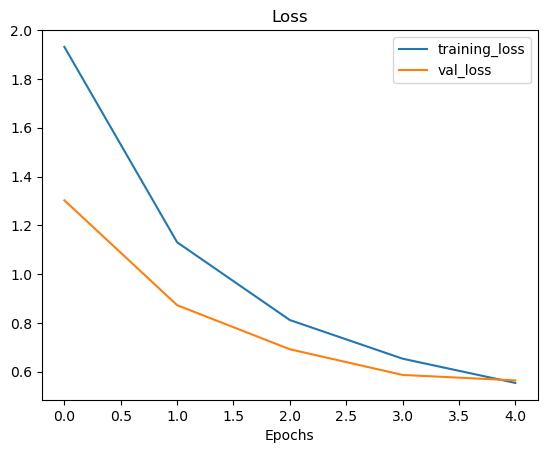

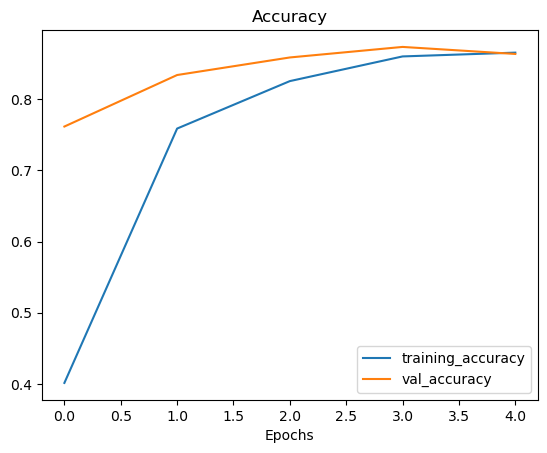

In [13]:
plot_loss_curves(history=history_10_percent)

In [17]:
#008 Getting a feature vector from our trained model
#demostrate GlobalAvgPoolingLayer2D
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor :\n {input_tensor}\n")

#pass tensor through GlobalAvgPoolingLayer2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled randon tensor:\n {global_average_pooled_tensor}\n")

# check shape of tensors
print(f"shape of input tensor: {input_tensor.shape}")
print(f"shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor :
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled randon tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensor: (1, 4, 4, 3)
shape of Global Average Pooled 2D tensor: (1, 3)


In [18]:
# replicating the layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [7]:
#009 Drilling into the concept of a feature vector (a learned representation)
#010 Downloading and preparing the data for Model 1 (1 percent of training data)
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [8]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [10]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#011 Building a data augmentation layer to use inside our model